### Regression in keras neural network

In [1]:
from sklearn.datasets import make_regression

In [2]:
X,Y= make_regression(n_samples=1000,
                     n_features=10,
                     n_informative=6,
                     noise=10,
                     random_state=45)

In [3]:
import pandas as pd
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [4]:
Y.columns=['target']

In [5]:
X.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [6]:
Y.isnull().sum()

target    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.transform(x_test))

### Building neural network with keras

In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
nn=Sequential()
nn.add(Dense(64,input_dim=x_train.shape[1],activation='relu'))
nn.add(Dense(32,activation='relu'))
nn.add(Dense(1,activation="linear"))

In [44]:
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                704       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [45]:
nn.compile(loss='mse',optimizer='adam')
hist=nn.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 6ms/step - loss: 22561.7871 - val_loss: 22044.9102
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 22386.2578 - val_loss: 21842.5117
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 22123.4961 - val_loss: 21504.9258
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 21687.9395 - val_loss: 20975.7383
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 21000.3164 - val_loss: 20174.7441
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 19964.1348 - val_loss: 19038.5684
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 18517.5527 - val_loss: 17459.3867
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 16638.3535 - val_loss: 15486.5732
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 14401.1152 - val_loss: 13164.1406
Epoch 10/100
20/20 [=================

20/20 [==============================] - 0s 2ms/step - loss: 128.5573 - val_loss: 184.3006
Epoch 80/100
20/20 [==============================] - 0s 2ms/step - loss: 127.5442 - val_loss: 182.3767
Epoch 81/100
20/20 [==============================] - 0s 2ms/step - loss: 125.8066 - val_loss: 178.0523
Epoch 82/100
20/20 [==============================] - 0s 2ms/step - loss: 123.7922 - val_loss: 177.1831
Epoch 83/100
20/20 [==============================] - 0s 2ms/step - loss: 123.1097 - val_loss: 174.6648
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 121.2033 - val_loss: 175.2606
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 120.2840 - val_loss: 173.2603
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 119.7362 - val_loss: 175.0742
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 117.9433 - val_loss: 170.4082
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 117

Text(0, 0.5, 'error')

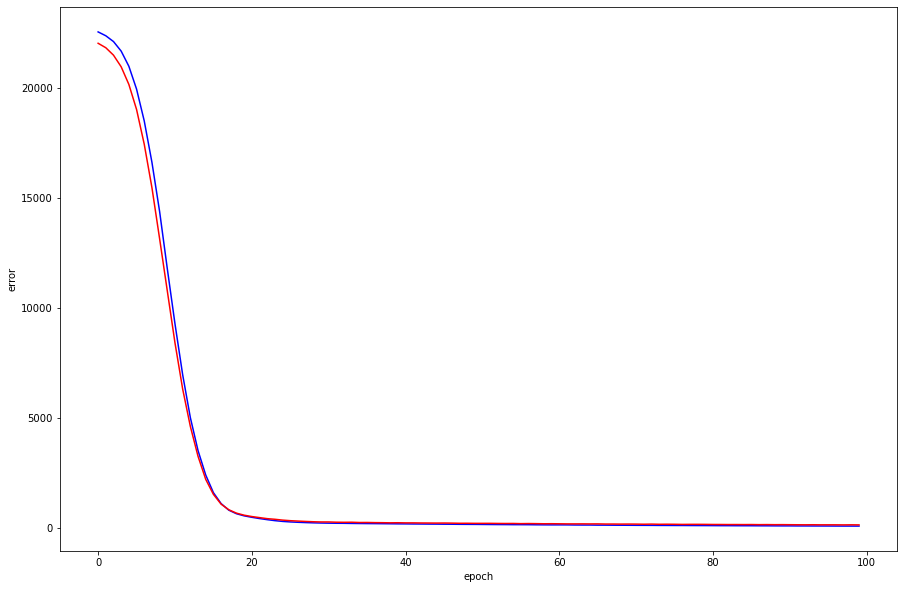

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(hist.history['loss'],c='b')
plt.plot(hist.history['val_loss'],c='r')
plt.xlabel("epoch")
plt.ylabel("error")

#### evaluation

In [47]:
tr_pred=nn.predict(x_train)
ts_pred=nn.predict(x_test)

7/7 [==============================] - 0s 1ms/step


In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### for training data

In [49]:
tr_mas=mean_absolute_error(y_train,tr_pred)
tr_mse=mean_squared_error(y_train,tr_pred)
tr_r2=r2_score(y_train,tr_pred)
print(" MSE={0}\n MAE={1}\n RMSE={2}\n R2={3}".format(tr_mse,tr_mas,tr_mse**0.5,tr_r2))

 MSE=113.39942002154592
 MAE=8.262109856154996
 RMSE=10.648916377807929
 R2=0.9949717217234728


### for testing

In [50]:
ts_mas=mean_absolute_error(y_test,ts_pred)
ts_mse=mean_squared_error(y_test,ts_pred)
ts_r2=r2_score(y_test,ts_pred)
print(" MSE={0}\n MAE={1}\n RMSE={2}\n R2={3}".format(ts_mse,ts_mas,ts_mse**0.5,ts_r2))

 MSE=150.42521771979582
 MAE=9.869598138663335
 RMSE=12.264795869471119
 R2=0.9934357821891353
